<a href="https://colab.research.google.com/github/vinay-kolapalli/Credit-card-fraud-detection-/blob/main/Credit_card_fraud_detection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# loading data set
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
# first five rows in data
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# last five rows in data
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
231761,146913.0,0.135179,0.935252,-0.579366,-0.755518,1.125709,-0.273561,0.829292,0.095958,-0.191372,...,-0.325262,-0.849794,0.036693,0.074885,-0.411679,0.123840,0.214098,0.068500,3.87,0.0
231762,146914.0,2.009887,0.047049,-1.769489,0.596013,0.301421,-0.657702,-0.047376,-0.082411,0.617851,...,-0.000784,0.289901,-0.003187,-0.469577,0.083699,0.645758,-0.042325,-0.045251,1.00,0.0
231763,146914.0,2.265661,-1.214115,-2.090430,-1.664874,-0.377943,-0.816423,-0.353379,-0.338228,-2.060582,...,0.026919,0.499632,0.001341,0.731310,0.338839,0.057754,-0.058458,-0.075243,45.94,0.0
231764,146914.0,0.575780,0.897242,-1.107907,-0.261612,0.517457,-0.221342,-0.616495,-2.763794,-0.098071,...,-1.667542,-0.790272,0.184152,0.352329,0.495858,0.205542,-0.070080,0.123444,1.98,0.0
231765,146915.0,0.159541,0.136713,-0.096359,-0.749048,1.223450,0.329321,0.263844,0.144150,0.505783,...,-0.248458,-0.697693,0.262273,-0.530160,-1.367492,-0.062736,NaN,NaN,NaN,NaN


In [ ]:
#information about the data
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231766 entries, 0 to 231765
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    231766 non-null  float64
 1   V1      231766 non-null  float64
 2   V2      231766 non-null  float64
 3   V3      231766 non-null  float64
 4   V4      231766 non-null  float64
 5   V5      231766 non-null  float64
 6   V6      231766 non-null  float64
 7   V7      231766 non-null  float64
 8   V8      231766 non-null  float64
 9   V9      231766 non-null  float64
 10  V10     231766 non-null  float64
 11  V11     231766 non-null  float64
 12  V12     231766 non-null  float64
 13  V13     231766 non-null  float64
 14  V14     231766 non-null  float64
 15  V15     231766 non-null  float64
 16  V16     231766 non-null  float64
 17  V17     231766 non-null  float64
 18  V18     231766 non-null  float64
 19  V19     231766 non-null  float64
 20  V20     231766 non-null  float64
 21  V21     23

In [ ]:
# Missing values from the data
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
# Number of Normal and Fraud transactions
credit_card_data['Class'].value_counts()

Class
0.0    231344
1.0       421
Name: count, dtype: int64

The data set is highly unbalanced
0 --> Normal Transactions
1 --> Fraud Transactions

In [ ]:
# classify the data based on the class values
Normal = credit_card_data[credit_card_data.Class == 0]
Fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(Normal.shape)
print(Fraud.shape)

(231344, 31)
(421, 31)


In [ ]:
# stastical properties of Normal Transactions
Normal.Amount.describe()

count    231344.000000
mean         90.992358
std         252.657829
min           0.000000
25%           6.000000
50%          23.460000
75%          79.980000
max       19656.530000
Name: Amount, dtype: float64

In [ ]:
# stastical properties of Fraud Transactions
Fraud.Amount.describe()

count     421.000000
mean      124.697625
std       255.873067
min         0.000000
25%         1.000000
50%        11.400000
75%       106.550000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# compare both the Normal and Fraud by their mean
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,80198.606119,-0.053760,-0.023344,0.179465,0.032648,-0.051383,0.030519,-0.012858,0.002009,0.007571,...,0.008669,-0.006973,-0.020531,-0.009295,0.000772,0.034790,0.002778,-0.000290,0.001620,90.992358
1.0,68057.353919,-5.323888,3.949193,-7.435806,4.660820,-3.736900,-1.366983,-6.216853,0.661728,-2.695500,...,0.375546,0.761533,0.010467,-0.059395,-0.084928,0.051298,0.040761,0.203384,0.058254,124.697625


As the data is highly Unbalanced we take same random no of data points from the Normal transactions and try to make it equal

No of Fraud transactions  = 492

In [ ]:
Normal_sample = Normal.sample(n = 492)

In [ ]:
# concentating the two data sets
new_dataset = pd.concat([Normal_sample,Fraud],axis = 0)

In [ ]:
# stastical properties of the new_dataset
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,79545.941057,0.013646,-0.003311,0.280779,0.005378,-0.026397,0.012632,-0.056118,-0.014220,-0.005191,...,-0.004717,0.016768,-0.006910,0.029034,0.012007,0.003714,-0.028481,-0.000388,-0.002895,75.636220
1.0,68057.353919,-5.323888,3.949193,-7.435806,4.660820,-3.736900,-1.366983,-6.216853,0.661728,-2.695500,...,0.375546,0.761533,0.010467,-0.059395,-0.084928,0.051298,0.040761,0.203384,0.058254,124.697625


In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2115,1629.0,-3.669047,2.774302,0.187411,-0.923085,-0.496639,1.328020,-2.649426,-7.180135,0.257099,...,7.531977,-2.788601,0.924407,-0.084336,-0.135116,0.370766,0.633030,0.075127,1.00,0.0
166962,118407.0,-1.538860,-0.374337,1.591340,-2.198766,-1.184727,2.286015,-1.189168,-2.246936,-0.507619,...,-1.153933,0.730402,-1.186770,-0.051906,0.379876,-0.177332,0.223322,0.038239,334.89,0.0
35953,38332.0,1.098020,-0.130844,1.103080,1.296468,-0.965354,-0.122958,-0.562304,0.209849,0.659390,...,0.148102,0.563789,-0.121847,0.551763,0.558124,-0.243514,0.048592,0.021196,16.84,0.0
49080,43902.0,-2.009838,1.227550,0.850399,3.112115,0.150859,-0.183154,-1.284980,-2.218290,-1.596735,...,-1.214808,0.960831,0.608186,0.373313,-0.257080,0.265078,0.337807,0.060842,0.76,0.0
7515,10268.0,-1.289700,0.131813,2.307909,-1.339342,-1.190684,-0.588385,-0.883165,0.547598,0.570625,...,0.225541,0.706048,-0.298993,0.356857,0.512670,-0.150602,0.154197,0.011899,22.00,0.0


In [ ]:
new_dataset['Class'].value_counts()

Class
0.0    492
1.0    421
Name: count, dtype: int64

splliting data set into Features and Targets

In [ ]:
X = new_dataset.drop(columns = 'Class', axis =1)
Y = new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
2115      1629.0 -3.669047  2.774302  0.187411 -0.923085 -0.496639  1.328020   
166962  118407.0 -1.538860 -0.374337  1.591340 -2.198766 -1.184727  2.286015   
35953    38332.0  1.098020 -0.130844  1.103080  1.296468 -0.965354 -0.122958   
49080    43902.0 -2.009838  1.227550  0.850399  3.112115  0.150859 -0.183154   
7515     10268.0 -1.289700  0.131813  2.307909 -1.339342 -1.190684 -0.588385   
...          ...       ...       ...       ...       ...       ...       ...   
226877  144839.0 -6.423306  1.658515 -5.866440  2.052064 -0.615817 -3.372266   
229712  146022.0  0.908637  2.849024 -5.647343  6.009415  0.216656 -2.397014   
229730  146026.0  1.894036  1.905806 -3.515730  4.508913  2.044466 -1.420468   
230076  146179.0 -0.067672  4.251181 -6.540388  7.283657  0.513541 -2.635066   
230476  146344.0 -0.099724  2.795414 -6.423856  3.247513 -1.632290 -2.766665   

              V7        V8        V9  .

In [ ]:
print(Y)

2115      0.0
166962    0.0
35953     0.0
49080     0.0
7515      0.0
         ... 
226877    1.0
229712    1.0
229730    1.0
230076    1.0
230476    1.0
Name: Class, Length: 913, dtype: float64


In [ ]:
# splliting data into train and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15, stratify = Y,random_state = 2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(913, 30) (776, 30) (137, 30)


Training the Model

In [ ]:
model = LogisticRegression()

In [ ]:
# Training the logistic model with the train data
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evalation

Accuracy score of train model


In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy of the training data: ', training_data_accuracy)

Accuracy of the training data:  0.9587628865979382


Testing the Model


In [ ]:
# Test the model with Testing data
X_test_prediction = model.predict(X_test)
Testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy of testing data: ', Testing_data_accuracy)

Accuracy of testing data:  0.8905109489051095


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

<Axes: xlabel='Class', ylabel='count'>

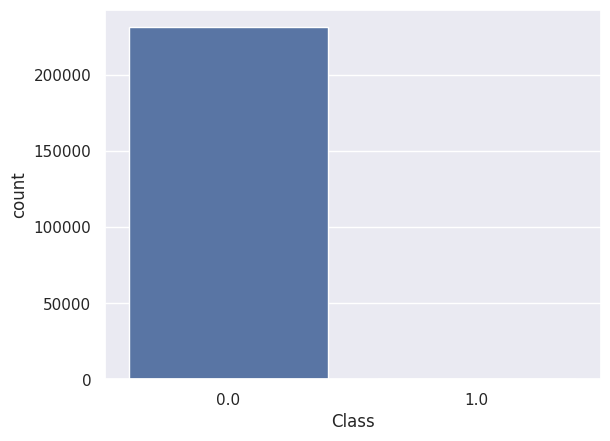

In [ ]:
sns.countplot(x = 'Class', data= credit_card_data)

Text(0, 0.5, 'Density')

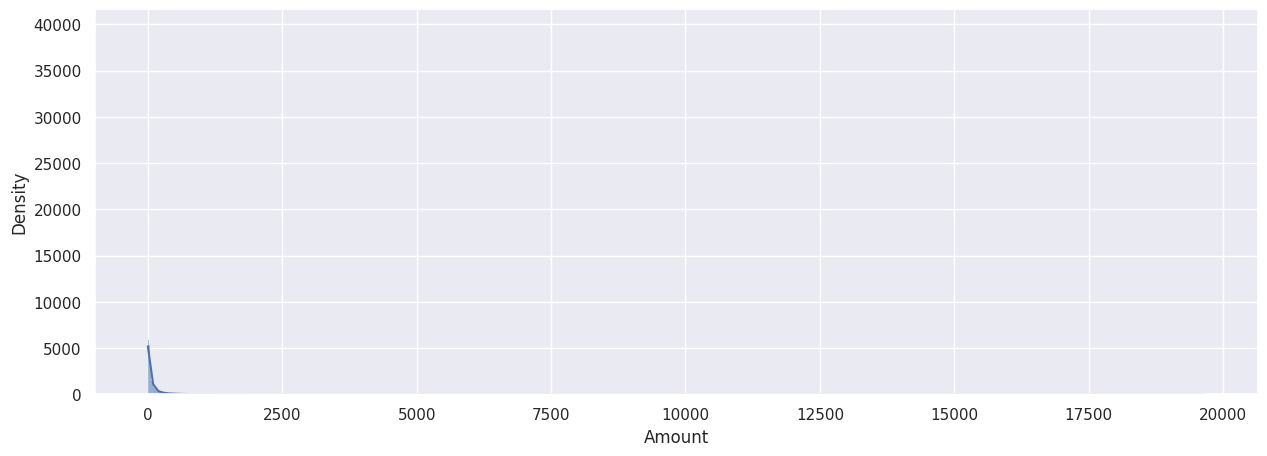

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(credit_card_data.Amount, kde = True)
plt.xlabel('Amount')
plt.ylabel('Density')

(0.0, 1000.0)

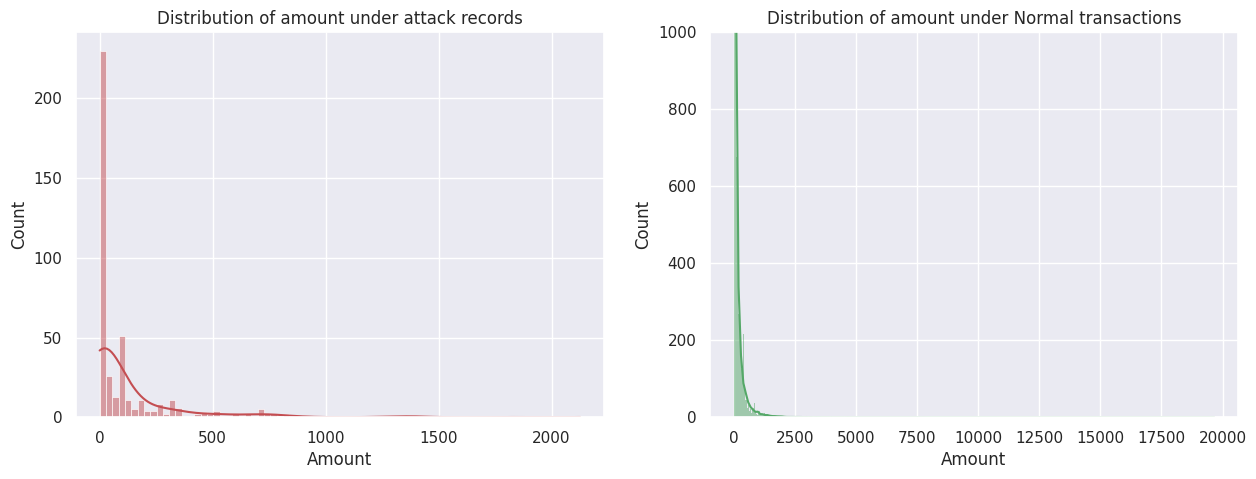

In [ ]:
figure, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(Fraud.Amount,ax=axes[0],kde = True, color ='r')
axes[0].set_title('Distribution of amount under attack records')

sns.histplot(Normal.Amount,ax = axes[1],kde = True,color = 'g')
axes[1].set_title('Distribution of amount under Normal transactions')
axes[1].set_ylim(0,1000)

Text(0.5, 1.0, 'Boxplot of amount distribution in Normal Transactions')

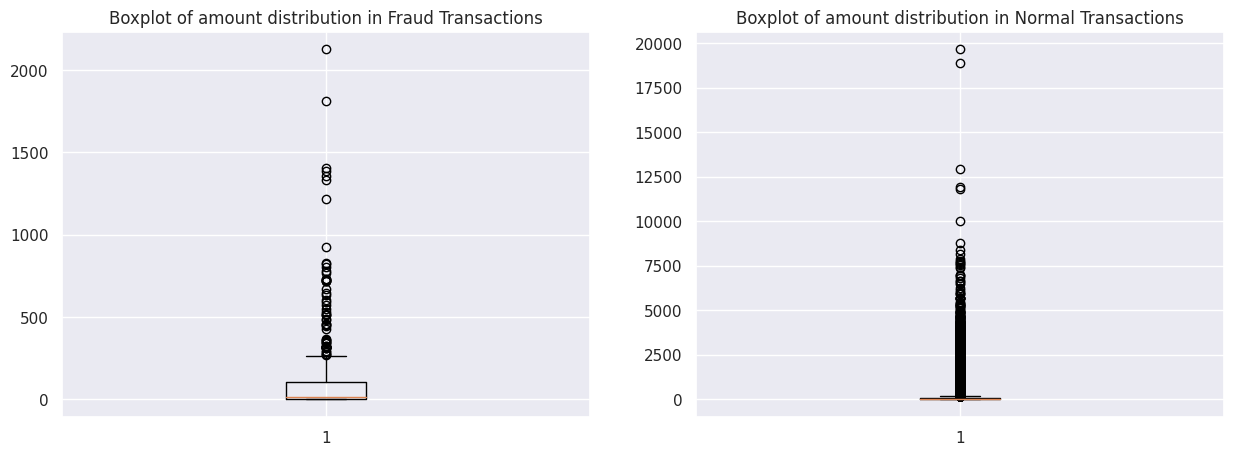

In [ ]:
figure, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].boxplot(Fraud.Amount)
axes[0].set_title('Boxplot of amount distribution in Fraud Transactions')

axes[1].boxplot(Normal.Amount)
axes[1].set_title('Boxplot of amount distribution in Normal Transactions')

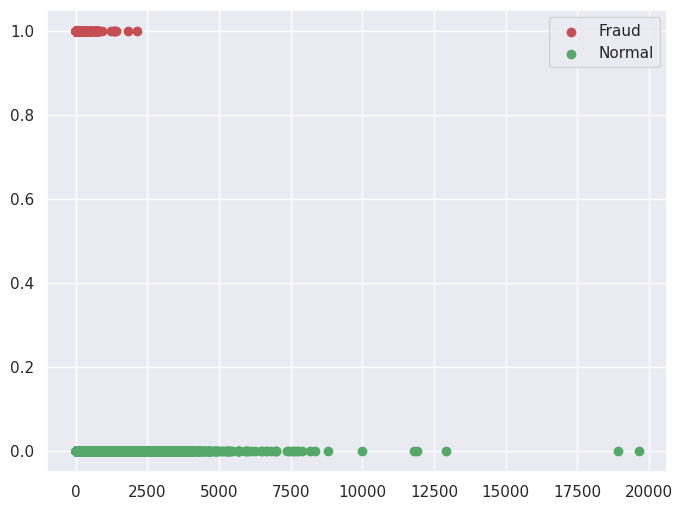

In [ ]:
plt.figure(figsize=(8,6), dpi = 100)
plt.scatter(Fraud.Amount,Fraud.Class,color = 'r',label= "Fraud")
plt.scatter(Normal.Amount,Normal.Class,color= 'g', label= "Normal")
plt.legend()

**Analysis of Time Feature**

Text(0, 0.5, 'Density')

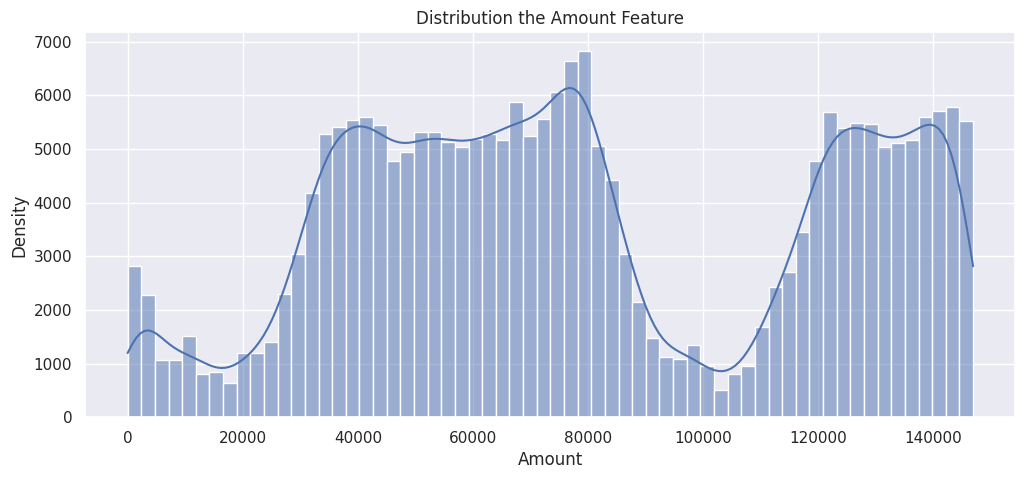

In [ ]:
plt.figure(figsize = (12,5) ,dpi = 100)
sns.histplot(credit_card_data.Time, kde =True)
plt.title("Distribution the Amount Feature")
plt.xlabel("Amount")
plt.ylabel("Density")

Text(0.5, 1.0, 'Distribtion of Amount in Fraud Transactions')

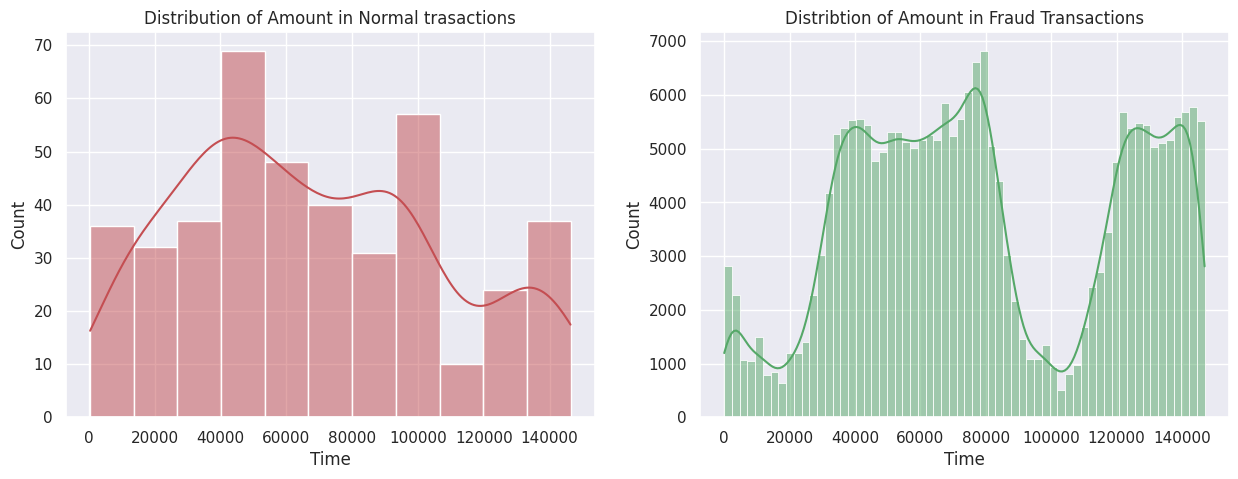

In [ ]:
figure,axes = plt.subplots(1,2,figsize=(15,5), dpi = 100)
sns.histplot(Fraud.Time,ax = axes[0], kde = True,color = 'r')
axes[0].set_title("Distribution of Amount in Normal trasactions")

sns.histplot(Normal.Time, ax = axes[1], kde= True, color = 'g')
axes[1].set_title("Distribtion of Amount in Fraud Transactions")

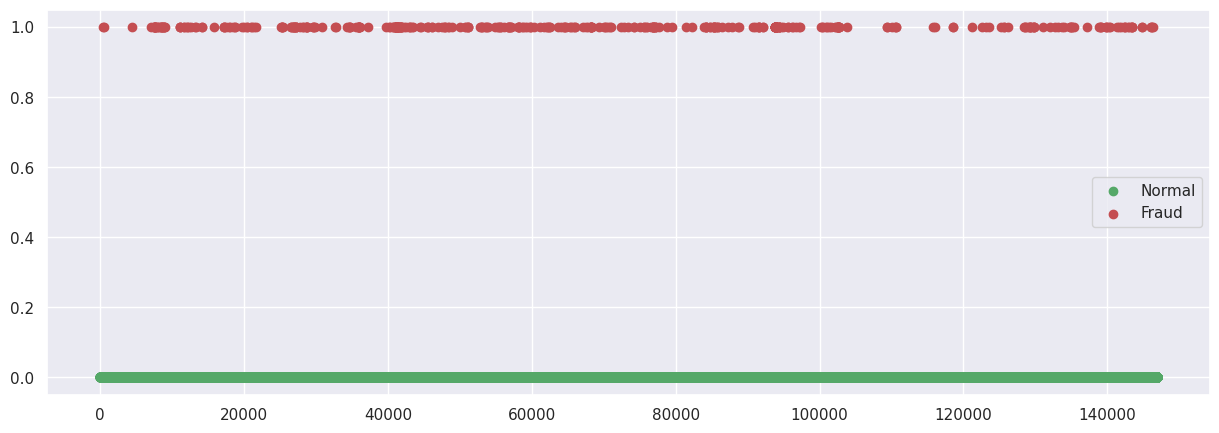

In [ ]:
plt.figure(figsize=(15,5), dpi = 100)
plt.scatter(Normal.Time,Normal.Class, color= 'g',label= 'Normal')
plt.scatter(Fraud.Time,Fraud.Class, color= 'r', label ='Fraud')
plt.legend()

Text(0, 0.5, 'Amount')

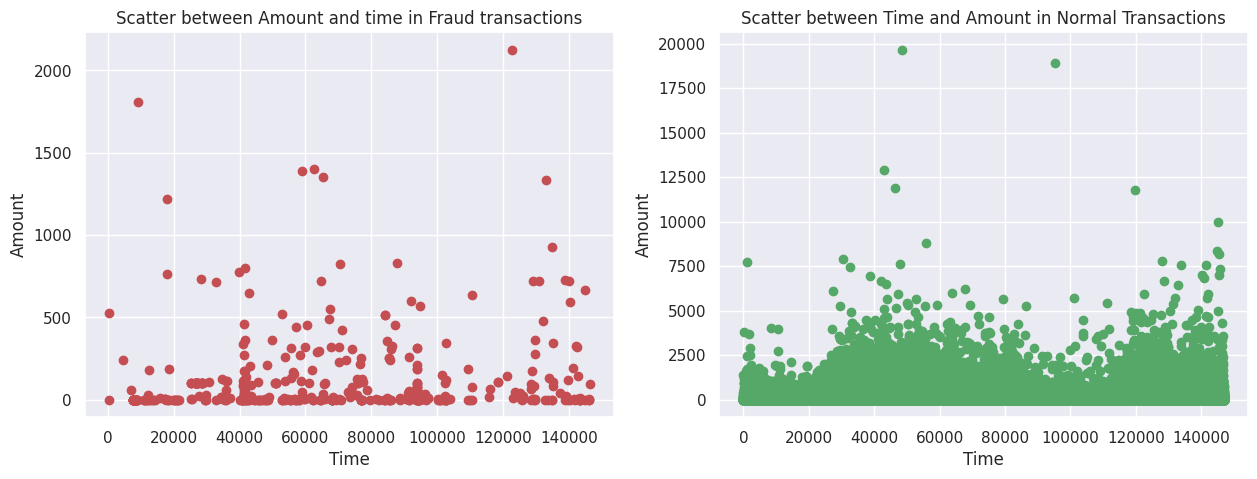

In [ ]:
figure,axes = plt.subplots(1,2,figsize=(15,5), dpi= 100)
axes[0].scatter(x = Fraud.Time,y = Fraud.Amount,color= 'r')
axes[0].set_title('Scatter between Amount and time in Fraud transactions')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Amount')

axes[1].scatter(x = Normal.Time, y =Normal.Amount, color= 'g')
axes[1].set_title("Scatter between Time and Amount in Normal Transactions")
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Amount')


Text(0.5, 1.0, 'Density of time on Fraud and Normal transactions')

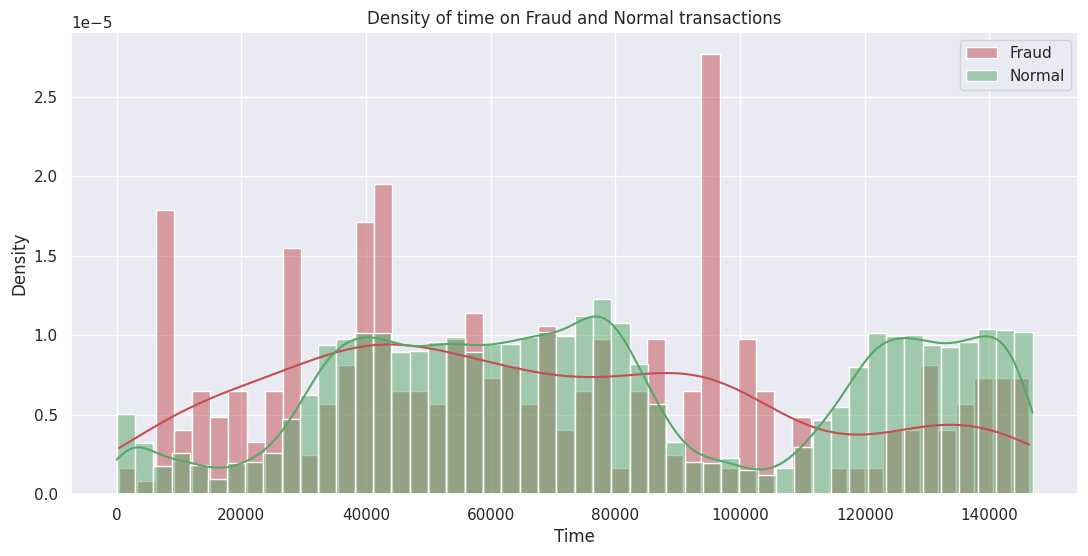

In [ ]:
plt.figure(figsize=(13,6), dpi =100)
sns.histplot(Fraud.Time,bins = 50, kde= True,stat = 'density',color= 'r', label="Fraud")
sns.histplot(Normal.Time,bins = 50,kde= True,stat = 'density',color= 'g',label= 'Normal')
plt.legend()
plt.title("Density of time on Fraud and Normal transactions")

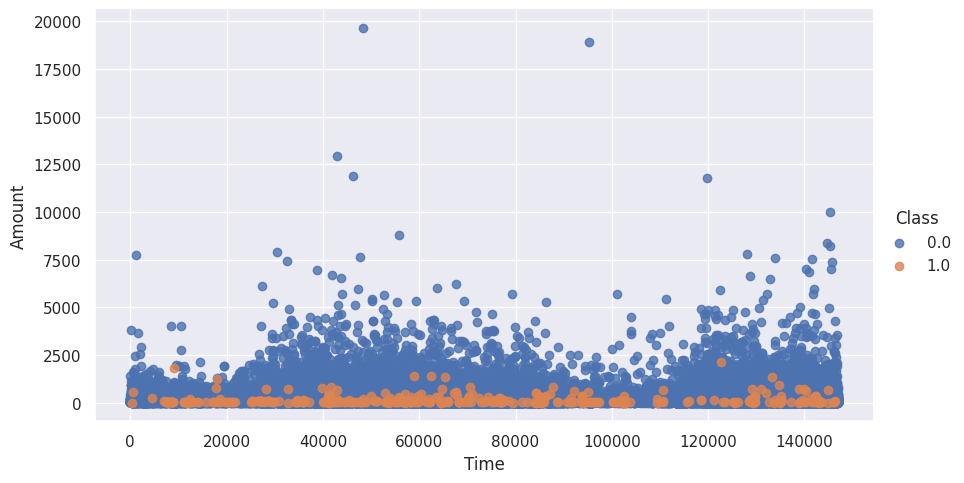

In [ ]:
sns.lmplot(y='Amount', x= 'Time', fit_reg = False,aspect = 1.8,data = credit_card_data,hue = 'Class')

Varibles vs class correlations

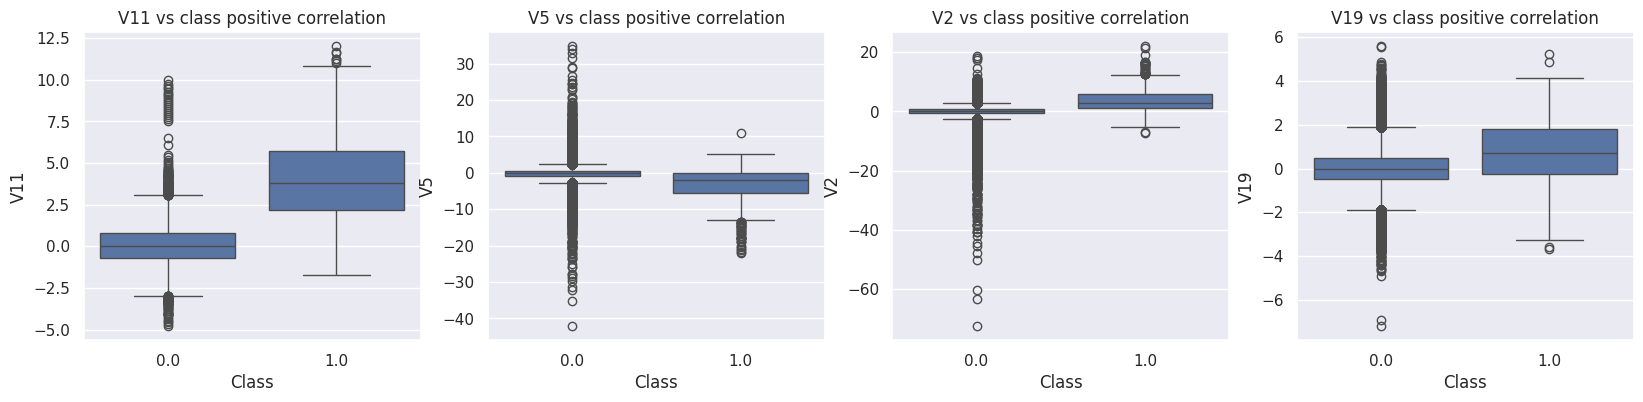

In [ ]:
figure,axes = plt.subplots(ncols= 4, figsize=(20,4))
sns.boxplot(x='Class',y = 'V11',data = credit_card_data,ax=axes[0])
axes[0].set_title("V11 vs class positive correlation")

sns.boxplot(x = 'Class', y= 'V5', data= credit_card_data,ax= axes[1])
axes[1].set_title("V5 vs class positive correlation")

sns.boxplot(x= 'Class', y= 'V2', data = credit_card_data,ax= axes[2])
axes[2].set_title("V2 vs class positive correlation")

sns.boxplot(x = 'Class', y ='V19', data=credit_card_data, ax= axes[3])
axes[3].set_title('V19 vs class positive correlation')

plt.show()

<Axes: xlabel='Class', ylabel='V17'>

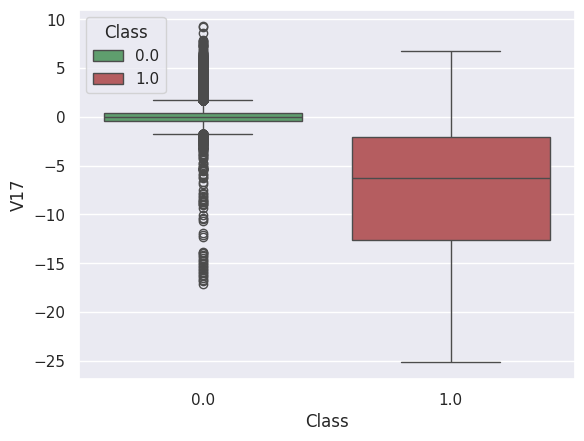

In [ ]:
colors= ['g','r']
sns.boxplot(x='Class', y= 'V17', hue= 'Class', data = credit_card_data,palette = colors)


<Axes: ylabel='V14'>

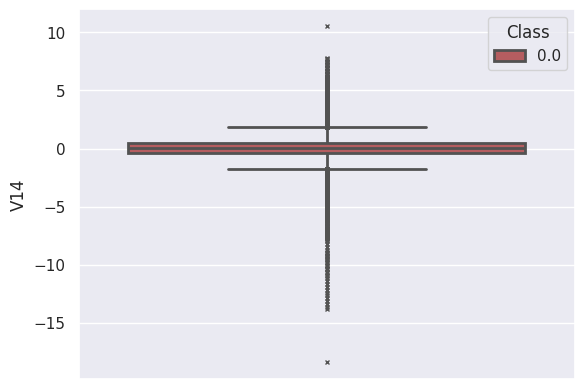

In [ ]:
color= ['r']
sns.boxplot(y = 'V14',hue = 'Class', data = Normal ,palette =color,linewidth = 2, flierprops = dict(marker= 'x',markersize = 3.5))

**Learning V's Features**

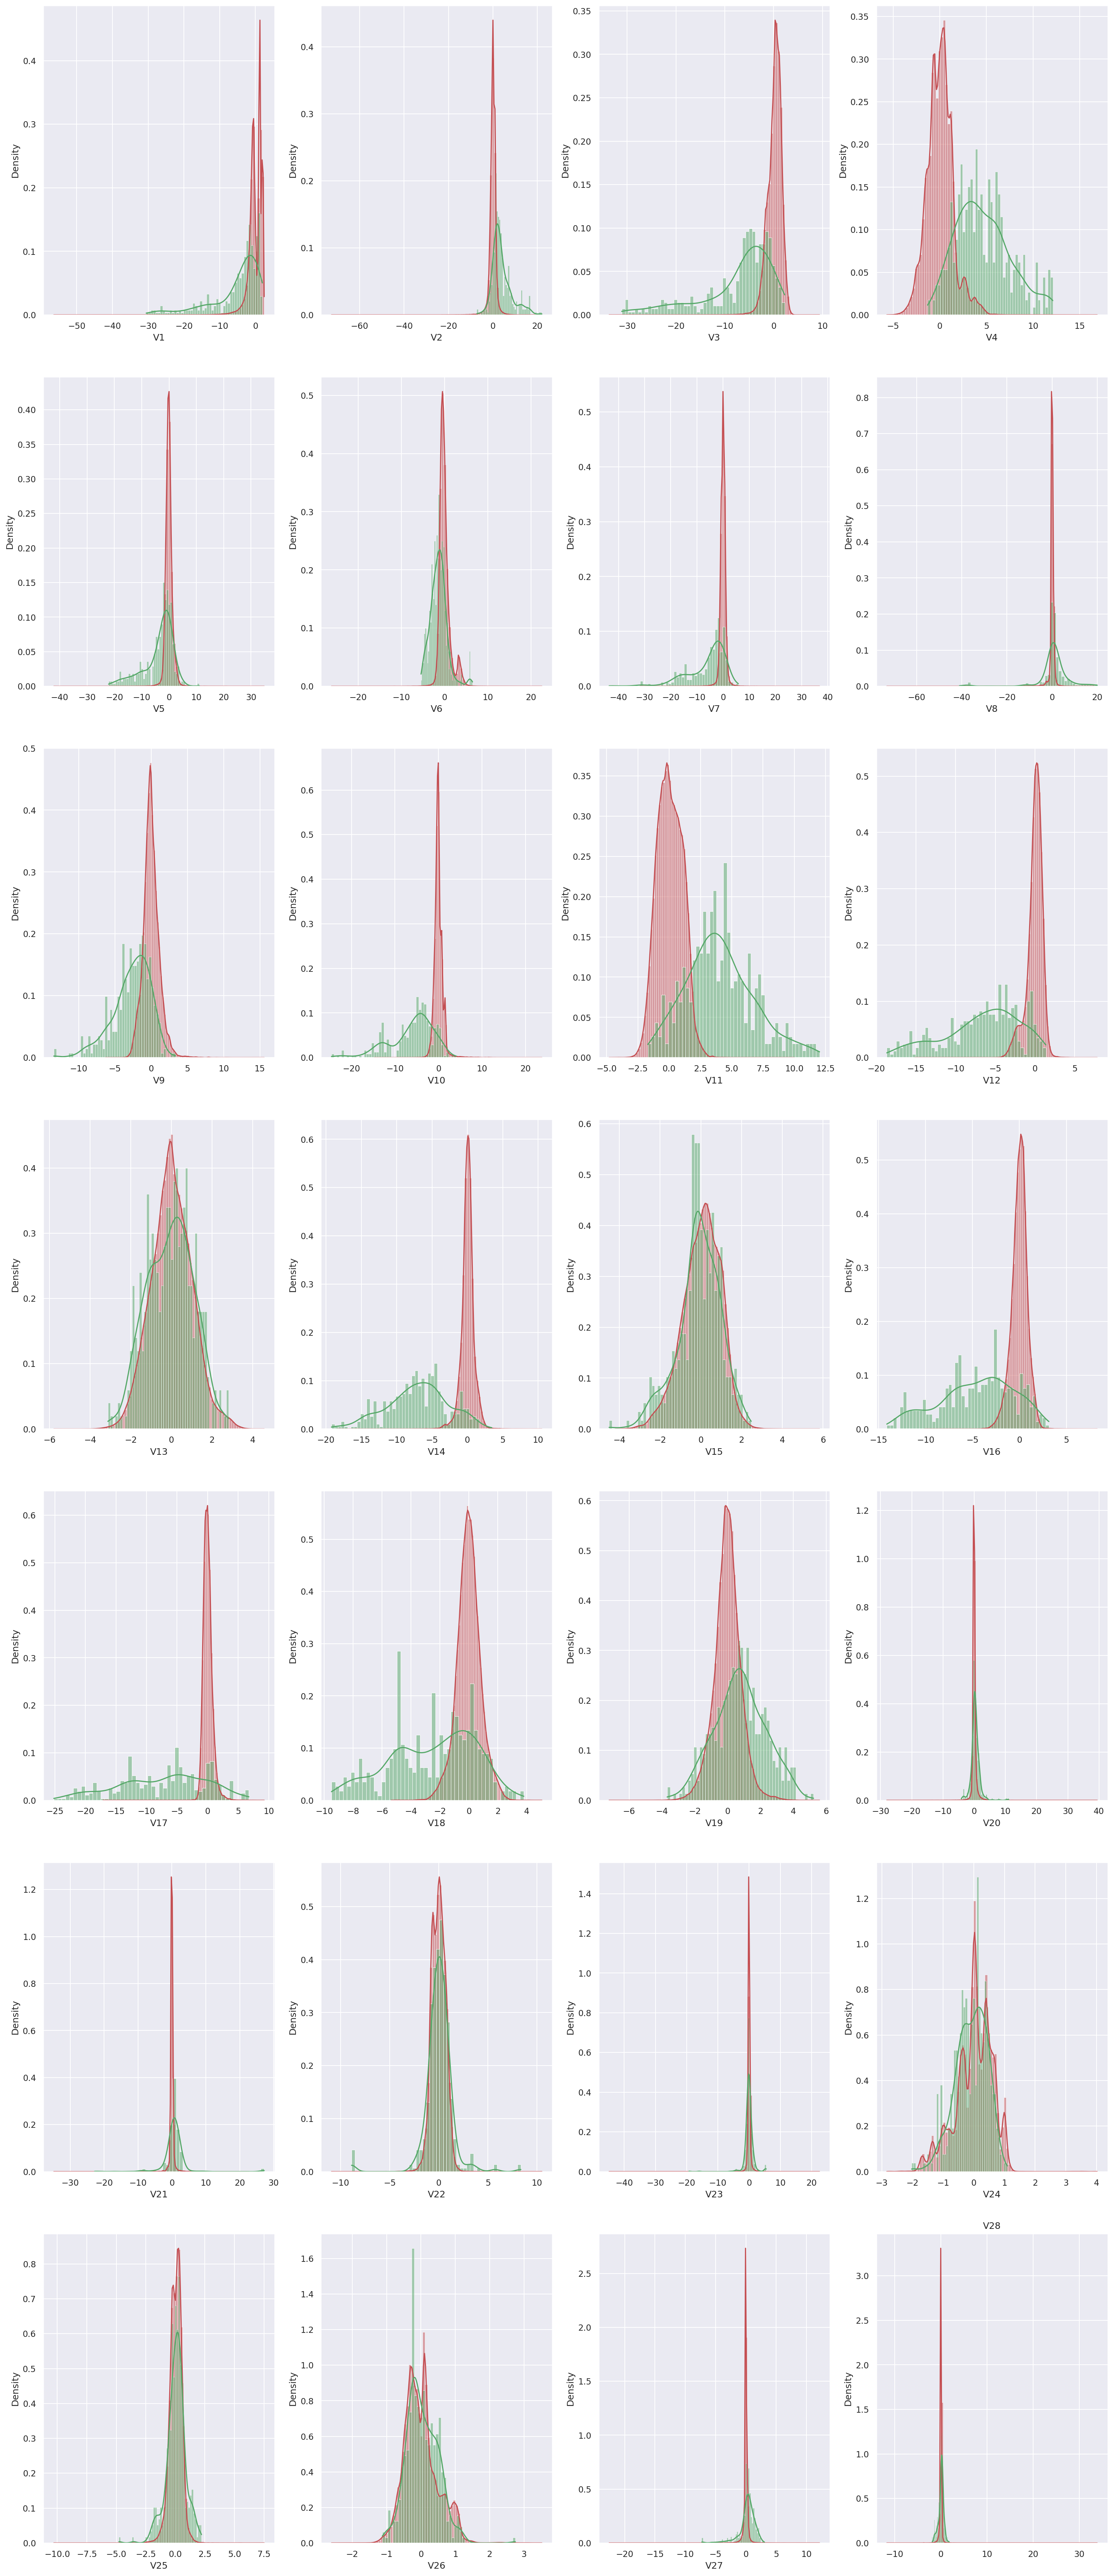

In [ ]:
columns = credit_card_data.iloc[:,1:29].columns
import matplotlib.gridspec as grid

plt.figure(figsize=(25, 15*4), dpi = 150)
for n,col in enumerate(credit_card_data[columns]):
  ax = plt.subplot(7,4,n+1)
  sns.histplot(Normal[col],kde = True, color= 'r',bins= 90, stat= 'density')
  sns.histplot(Fraud[col], kde = True,color= 'g', bins = 50, stat = 'density')

ax.set_title(str(col))
ax.set_ylabel('Density')
ax.set_xlabel('')
plt.show()

**Correlation Matrix **

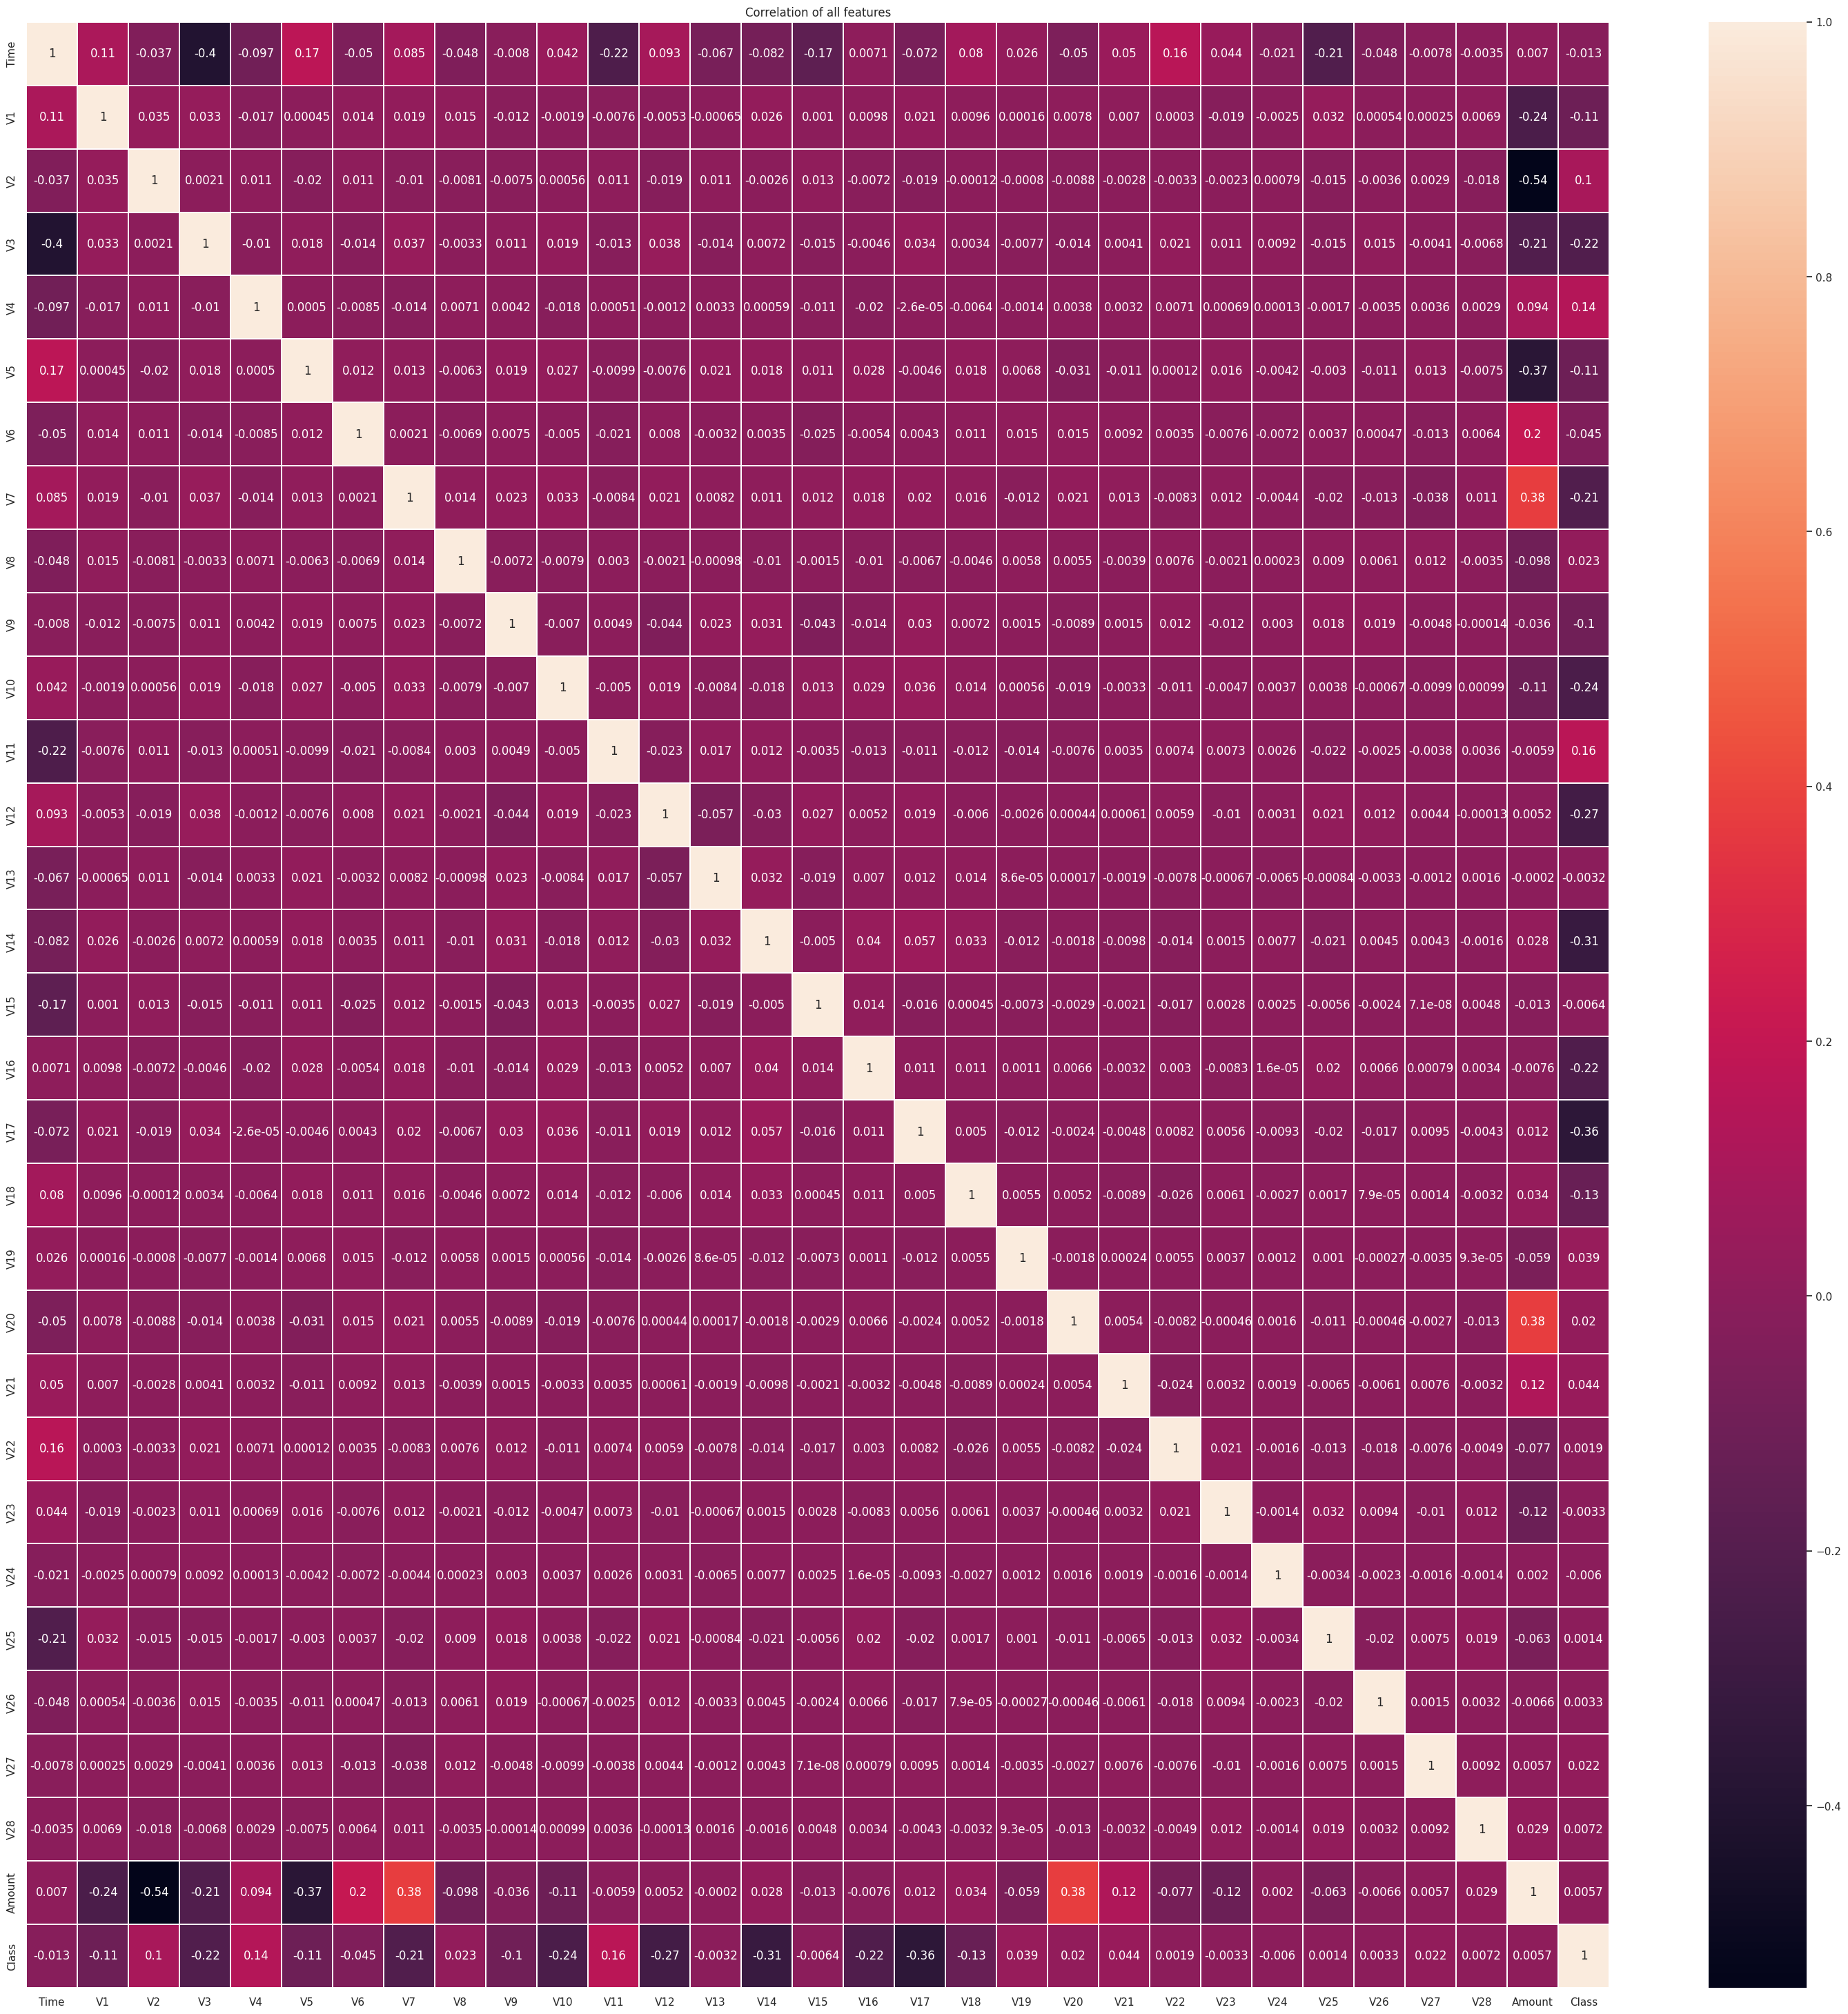

In [ ]:
corr = credit_card_data.corr()
plt.figure(figsize=(37,37))
sns.heatmap(corr, annot= True, linewidth = 0.1)
plt.title("Correlation of all features")
plt.show()

<BarContainer object of 30 artists>

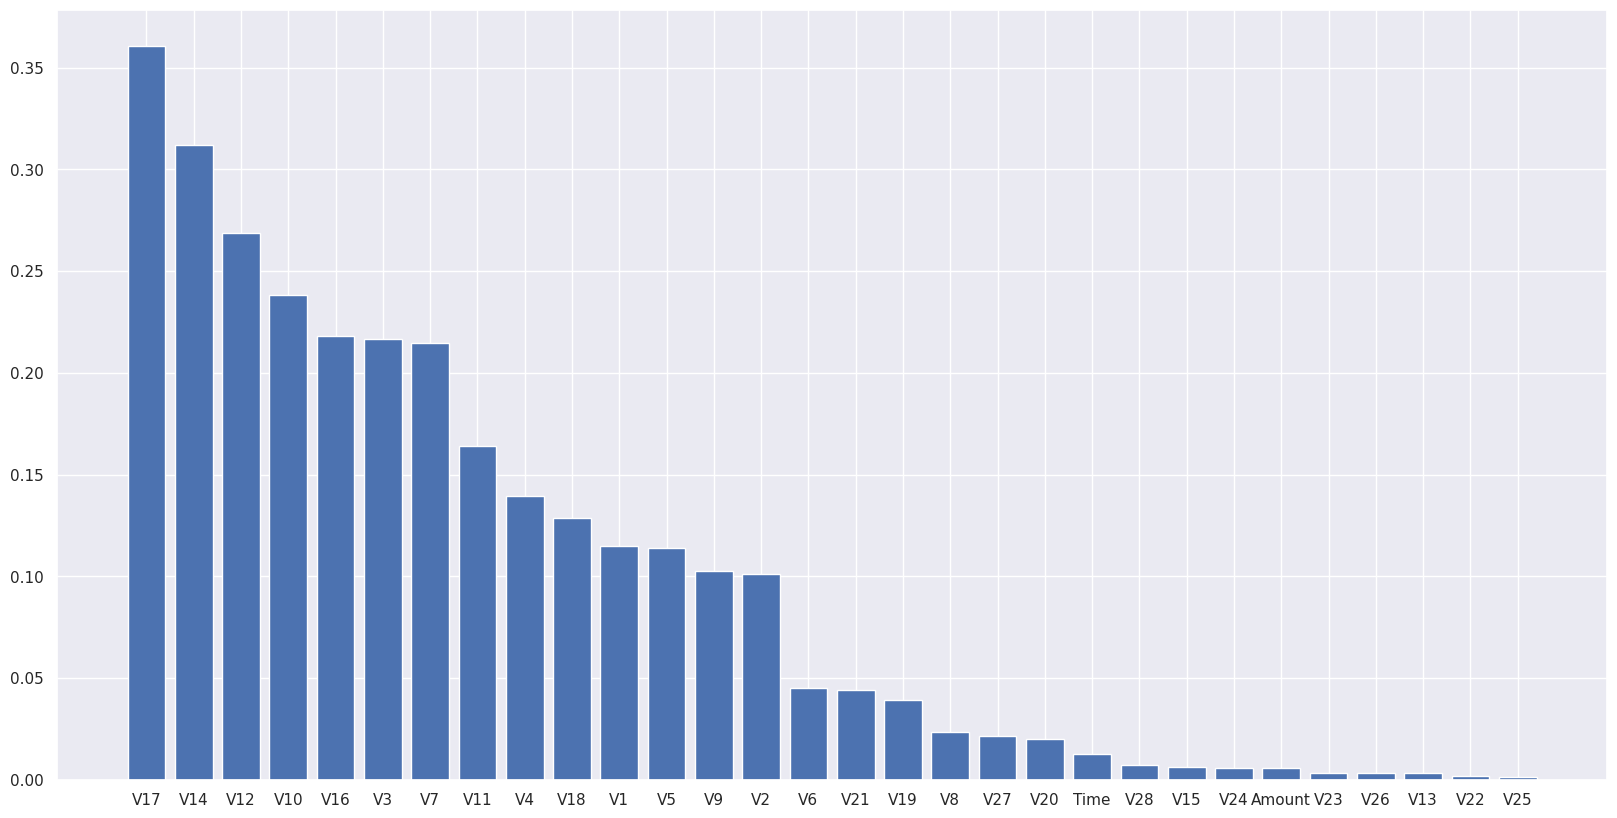

In [ ]:
cor_target = pd.DataFrame(abs(corr['Class']))
cor_target['columns'] = cor_target.index
cor_target.rename(columns = {'Class' : 'corr_class'}, inplace= True)
cor_target.sort_values('corr_class',ascending= False, inplace= True)
cor_target.reset_index(inplace = True, drop = True)
cor_target.drop(index = 0,axis = 1, inplace = True)

plt.figure(figsize=(20,10))
plt.bar(cor_target['columns'], cor_target['corr_class'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors= 5)
KNN_model.fit(X_train, Y_train)
y_pred = KNN_model.predict(X_test)

In [ ]:
model_1 = LogisticRegression(max_iter= 1000)
model_1.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_proba = KNN_model.predict_proba(X_test)
y_pred_proba

array([[0. , 1. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0. , 1. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.6, 0.4],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.4, 0.6],
       [0. , 1. ],
       [0.4, 0.6],
       [0.8,

In [ ]:
y_pred_edited = y_pred_proba[:,1] >= 0.2
y_pred_edited = y_pred_edited.astype(int)
y_pred_edited

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [ ]:
from sklearn import metrics
class_report = metrics.classification_report(Y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.65      0.77      0.70        74
         1.0       0.65      0.51      0.57        63

    accuracy                           0.65       137
   macro avg       0.65      0.64      0.64       137
weighted avg       0.65      0.65      0.64       137



Confussion Matrix for Logistic regression

<Axes: >

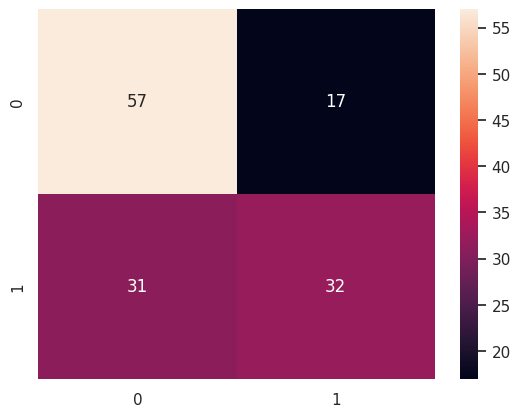

In [ ]:
conv_mat = metrics.confusion_matrix(Y_test, y_pred)
conv_mat
sns.heatmap(conv_mat, annot= True)

In [ ]:
accuracy = metrics.accuracy_score(y_pred,Y_test)
precsion= metrics.precision_score(y_pred,Y_test)
f1_score = metrics.f1_score(y_pred,Y_test)
recall= metrics.recall_score(y_pred,Y_test)

print('Accuracy = ', accuracy.round(4) * 100  ,'%')
print('precsion = ' ,precsion.round(4) * 100 , '%')
print('f1_score = ', f1_score.round(4) * 100  ,'%')
print('recall = ', recall.round(4) * 100  ,'%')


Accuracy =  64.96 %
precsion =  50.79 %
f1_score =  57.14 %
recall =  65.31 %


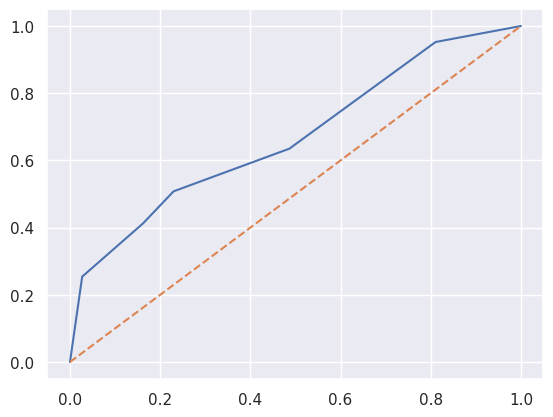

In [ ]:
import matplotlib.pyplot as plt
fpr,tpr, thresholds= metrics.roc_curve(Y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], '--')

**SVM ALGORTHIM** *italicized text*

In [ ]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', probability = True)
SVM_model.fit(X_train, Y_train)
y_pred = SVM_model.predict(X_test)
y_pred_proba = SVM_model.predict_proba(X_test)

In [ ]:
y_pred_edited = y_pred_proba[:,1] >= 0.2
y_pred_edited = y_pred_edited.astype(int)
y_pred_edited

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0])

In [ ]:
from sklearn import metrics
class_report = metrics.classification_report(Y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89        74
         1.0       0.94      0.76      0.84        63

    accuracy                           0.87       137
   macro avg       0.88      0.86      0.86       137
weighted avg       0.88      0.87      0.87       137



<Axes: >

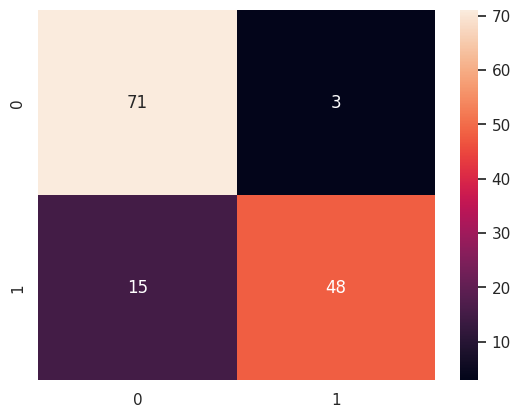

In [ ]:
import seaborn as sns
conv_mat = metrics.confusion_matrix(Y_test,y_pred)
conv_mat
sns.heatmap(conv_mat, annot = True)

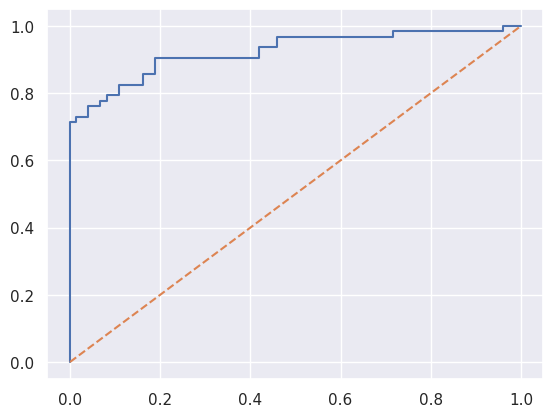

In [ ]:
import matplotlib.pyplot as plt
fpr,tpr,threshold = metrics.roc_curve(Y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1],'--')


In [ ]:
auc = metrics.roc_auc_score(Y_test,y_pred_proba[:,1])
print('AUC= ' , auc.round(3)* 100 , '%')

AUC=  92.4 %


In [ ]:
accuracy = metrics.accuracy_score(y_pred,Y_test)
precsion= metrics.precision_score(y_pred,Y_test)
f1_score = metrics.f1_score(y_pred,Y_test)
recall= metrics.recall_score(y_pred,Y_test)

print('Accuracy = ', accuracy.round(4) * 100  ,'%')
print('precsion = ' ,precsion.round(4) * 100 , '%')
print('f1_score = ', f1_score.round(4) * 100  ,'%')
print('recall = ', recall.round(4) * 100  ,'%')


Accuracy =  86.86 %
precsion =  76.19 %
f1_score =  84.21 %
recall =  94.12 %


linear
poly
rbf
sigmoid


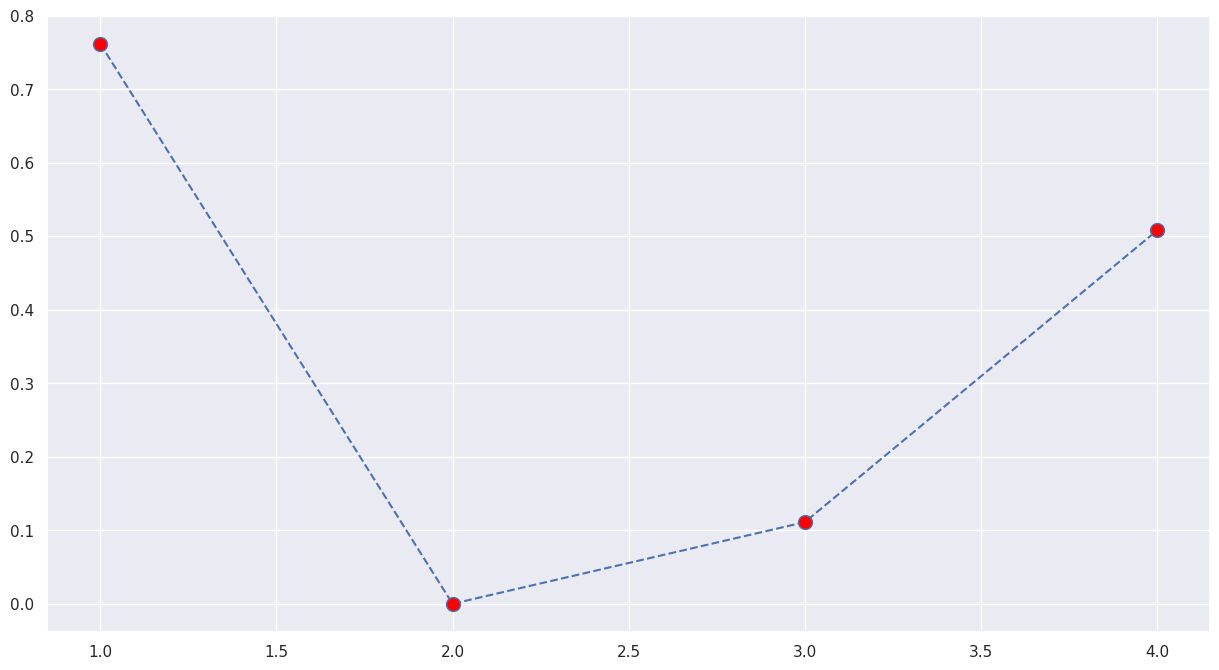

In [ ]:
Error = []
for i in ['linear','poly' ,'rbf','sigmoid']:
  print(i)
  SVM_model_temp = SVC(kernel = i)
  SVM_model_temp.fit(X_train,Y_train)
  y_pred_temp = SVM_model_temp.predict(X_test)
  Error.append(metrics.recall_score(Y_test,y_pred_temp))
plt.figure(figsize=(15,8))
plt.plot(range(1,5) , Error, 'bo--' ,markerfacecolor= 'red', markersize = 10)

In [ ]:
accuaracy = metrics.accuracy_score(Y_test, y_pred)
recall = metrics.recall_score(Y_test, y_pred)
precision = metrics.precision_score(Y_test,y_pred)
f1_score = metrics.f1_score(Y_test,y_pred)

print('Accuaracy = ' , accuaracy.round(3)*100 ,'%')
print('Recall = ', recall.round(3)*100,'%')
print('Precision = ', precision.round(3)*100,'%')
print('F1_score = ', f1_score.round(3)*100,'%')

Accuaracy =  86.9 %
Recall =  76.2 %
Precision =  94.1 %
F1_score =  84.2 %


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
R_F_model = RandomForestClassifier()
R_F_model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_pred = R_F_model.predict(X_test)
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94        74
         1.0       0.98      0.86      0.92        63

    accuracy                           0.93       137
   macro avg       0.94      0.92      0.93       137
weighted avg       0.93      0.93      0.93       137



<Axes: >

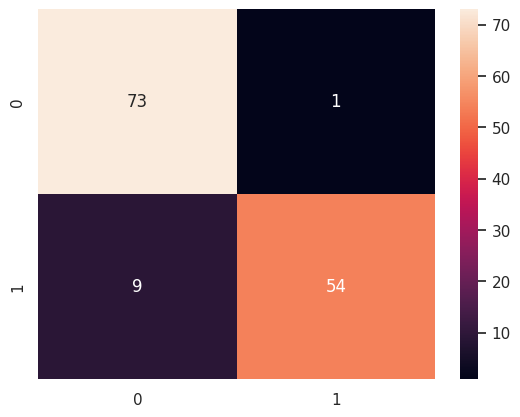

In [ ]:
import seaborn as sns
conv_mat = metrics.confusion_matrix(Y_test,y_pred)
conv_mat
sns.heatmap(conv_mat, annot= True)

In [ ]:
accuaracy = metrics.accuracy_score(Y_test, y_pred)
recall = metrics.recall_score(Y_test, y_pred)
precision = metrics.precision_score(Y_test,y_pred)
f1_score = metrics.f1_score(Y_test,y_pred)

print('Accuaracy = ' , accuaracy.round(3)*100 ,'%')
print('Recall = ', recall.round(3)*100,'%')
print('Precision = ', precision.round(3)*100,'%')
print('F1_score = ', f1_score.round(3)*100,'%')

Accuaracy =  92.7 %
Recall =  85.7 %
Precision =  98.2 %
F1_score =  91.5 %
